# Formalia

Please read the [assignment overview page](https://github.com/TheYuanLiao/comsocsci2025/wiki/Assignments) carefully before proceeding. The page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment.

We teach about Pandas Dataframe and there is a video on how to use pandas and mistakes not to make when using it (see [Week 2](https://nbviewer.org/github/TheYuanLiao/comsocsci2025/blob/main/lectures/Week2.ipynb)/Prelude to part 3: Pandas Dataframes). We expect you to apply that knowledge in all exercises. A score of 3 means "excellent", where we expect you to deliver efficient dataframe operations, i.e., operations are implemented in a vectorized, efficient manner using pandas recommended practices.

__If you fail to follow these simple instructions, it will negatively impact your grade!__

**Due date and time**: The assignment is due on April 1st at 23:59. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Assignment 2)_. 

Remember to include in the first cell of your notebook:
* the link to your group's Git repository 
* group members' contributions


Link to Git repository: 

https://github.com/cruesli/CSS_group13

# Contributions

Simon 33%$\\$
Gustav 33%$\\$
Magnus 33%$\\$

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# mpl setup
mpl.rcParams['image.cmap'] = 'ocean'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2(np.linspace(0, 1, 8)))
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color = [(225/255,102/255,102/255), (82/255,158/255,205/255),  (194/255,226/255,170/255), (225/255,178/255,102/255), (178/255,102/255,225/255),(225/255,225/255,102/255),(102/255,102/255,225/255)])
mpl.rcParams['font.family'] = 'Helvetica Neue'
mpl.rcParams['figure.figsize'] = (6, 4)
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['figure.dpi'] = 200
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Part 1: Properties of the real-world network of Computational Social Scientists

These exercises are taken from Week 5. Please note that 2 Degree distribution is taken out and 3 Shortest paths is numbered 2 here.
> __Exercise: Analyzing Networks through a Random Model__ 
>
>
>
> 1. _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula). 
> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.   
> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). 
>
> * Answer the following questions __(max 200 words in total)__: 
>    - What regime does your random network fall into? Is it above or below the critical threshold?  
>    - According to the textbook, what does the network's structure resemble in this regime?  
>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.
>
>   





In [27]:
# Part 1
import json
import networkx as nx
import netwulf
# Open and read the JSON file
with open('coauthorship_network.json', 'r') as file:
    data = json.load(file)

G = nx.node_link_graph(data, edges='links')
N = G.number_of_nodes()
L = G.number_of_edges()
L_max = N*(N-1)/2
p = L/L_max # Calculate p
avg_deg = p*(N-1) # Use p to get average degree
print(f'p: {round(p,6)}, Average degree: {round(avg_deg,2)},     n nodes: {G.number_of_nodes()}, n edges: {G.number_of_edges()}')

p: 0.000526, Average degree: 7.13,     n nodes: 13568, n edges: 48367


In [24]:
from collections import defaultdict

links = defaultdict()
nodes = np.arange(N)

for i in range(N-1):
    uni_sample = np.random.uniform(0,1,N-(i+1))
    connections = nodes[i+1:][uni_sample < p]
    for j in connections:
        if i != j:
            pair = tuple(sorted([i,j]))
            links[pair] = 1
edgelist = [(i, j) for (i, j) in links.keys()]
rand_net = nx.Graph()
rand_net.add_nodes_from(nodes)
rand_net.add_edges_from(edgelist)
rand_net.number_of_nodes(), rand_net.number_of_edges()

(13568, 48230)

In [25]:
print(f'Critical threshold: 1, Connectivity treshold: {np.log(N)}')

Critical threshold: 1, Connectivity treshold: 9.515469358031684


In [16]:
degrees = sorted(d for n, d in rand_net.degree())
vals, counts = np.unique(degrees, return_counts=True)
mode_index = np.argmax(counts)
mode = vals[mode_index]
print(f'mean degree: {np.mean(degrees)}, median degree: {np.median(degrees)}, mode of degree: {mode}, min degree: {np.min(degrees)}, max degree: {np.max(degrees)}')

mean degree: 7.051149764150943, median degree: 7.0, mode of degree: 6, min degree: 0, max degree: 19


In [31]:
# Change country code to group, to allow netwulf to group authors by country
for k, v in G.nodes(data=True):
    v['group'] = v['country_code']; del v['country_code']
netwulf.visualize(G)

/opt/homebrew/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


(None, None)

<div style="display: flex;">
  <img src="CSS_net.png" alt="Image 1" width="550">
  <img src="rand_net.png" alt="Image 2" width="550">
</div>

On the left is our CSS network, and on the right is the random network. As can be seen there are no distinct clusters of nodes and very little difference in degrees.

As it is a random network, the links are pure chaos as opposed to the CSS network where there is a structure to how authors are linked. Therefore it is difficult to say anything about the structure of the random network other than that it is random. The degree span is also vastly different, with the maximum degree level in the random network only straying a little from the mean, compared to the CSS network, where the difference between the max and mean degree is a factor of about 38. The networks structure is a supercritical structure as it is above the critical treshold and below the connectivity treshold.

> 2. _Shortest Paths_: Here, we will check if the Computational Social Scientists Network exhibits characteristics of a small-world network by analyzing its shortest paths.
> * Begin by identifying the largest connected component within the Computational Social Scientists network. Recall that a connected component is a subset of nodes in which every pair of nodes is connected by a path. For a refresher on connected components, see section 2.9 of the Network Science book. Follow these steps:
>    - Utilize [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to enumerate all connected components, which will be returned as a list of node subsets.
>    - Select the largest subset of nodes identified in the previous step. Then, create a subgraph of your original network that includes only these nodes, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This subset forms your largest connected component, sometimes referred to as the [giant component](https://en.wikipedia.org/wiki/Giant_component).
> * Calculate the average (unweighted) shortest path length within this giant component by employing [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html).
> * Perform the same calculation for the giant component of the random network you constructed in the above exercise 1.
> * Reflect on how the average shortest path lengths of the real and random networks compare and answer the following questions, supporting your answers with the theory from the book.
>   - Why do you think I asked you to consider the giant component only?
>   - Why do you think I asked you to consider unweighted edges?
>   - Does the Computational Social Scientists network exhibit the small-world phenomenon?

In [ ]:
# Part 2
# Esctract giant components as subgraphs
largest_cc = max(nx.connected_components(G), key=len)
S_CSS = G.subgraph(largest_cc).copy()
largest_cc = max(nx.connected_components(rand_net), key=len)
S_rand_net = rand_net.subgraph(largest_cc).copy()

In [19]:
asp_CSS = nx.average_shortest_path_length(S_CSS)
asp_rand_net = nx.average_shortest_path_length(S_rand_net)
print(f'Average shortest path for, CSS: {asp_CSS}, random network: {asp_rand_net}')

Average shortest path for, CSS: 5.702976067981664, random network: 5.095074390471775


These are more similar, as could be expected since the small world problem is the only property of random networks that holds true for real world networks

>   - Why do you think I asked you to consider the giant component only?

Including the smaller components would skew the average towards a smaller shortest path as they are inherently smaller, 
 
>   - Why do you think I asked you to consider unweighted edges? 

So that we could compare the unweighted edges of the random network to the edges of the CSS network.

>   - Does the Computational Social Scientists network exhibit the small-world phenomenon? 

Yes, as on average the shortest path between two nodes is similar to that of the small world problem where there is 6 intermediate nodes

## Part 2 Network Analysis in Computational Social Science

These exercises are taken from Week 6: __Exercise 1: Mixing Patterns and Assortativity__ and __Exercise 3: Zachary's karate club__.

> __Exercise 1: Mixing Patterns and Assortativity__ 
>
> __Part 1: Assortativity Coefficient__ 
> 1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**
>
> __Part 2: Configuration model__
> In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.  
>
> 2. *Implement the configuration model* using the _double edge swap_ algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:
>   - **a.** Create an exact copy of your original network.
>   - **b.** Select two edges, $e_{1} = (u,v)$ and $e_{2} = (x,y)$, ensuring *u != y* and *v != x*.
>   - **c.** Flip the direction of $e_{1}$ to $e_{1} = (v,u)$ 50% of the time. This ensure that your final results is not biased, in case your edges were sorted (they usually are). 
>   - **d.** Ensure that new edges $e_{1}' = (e_{1}[0],e_{2}[1])$ and $e_{2}' = (e_{2}[0],e_{1}[1])$ do not already exist in the network.
>   - **e.** Remove edges $e_{1}$ and $e_{2}$ and add edges $e_{1}'$ and $e_{2}'$.
>   - **f.** Repeat steps **b** to **e** until you have performed _E*10_ swaps, where E is the total number of edges.
> 3. *Double check that your algorithm works well*, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.
>
>
> __Part 3: Analyzing Assortativity in Random Networks__  
>
> 4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.
>


In [32]:
import json
import networkx as nx
import netwulf
# Open and read the JSON file
with open('coauthorship_network.json', 'r') as file:
    data = json.load(file)

G = nx.node_link_graph(data, edges='links')
largest_cc = max(nx.connected_components(G), key=len)
S = G.subgraph(largest_cc).copy()

In [33]:
# Part 1
import numpy as np
def get_country_assortativity_coef(G):
    degrees = dict(G.degree())
    E = len(G.edges())

    same_country = 0
    for (i, j) in list(G.edges()): # Compute total amount of edges between nodes of same type
        if G.nodes[i].get('country_code') == G.nodes[j].get('country_code'):
            same_country += 1/E
            
    degs = np.array(list(degrees.values()))
    total_half_stubs = sum(degs)
    country_deg_sum = {}
    for node, data in S.nodes(data=True): # sum up amount of nodes with each country code
        country = data.get('country_code')
        country_deg_sum[country] = country_deg_sum.get(country, 0) + degrees[node]
    
    # Expected fraction of edges between nodes of same type
    exp_same_country = sum((country_half_stubs/total_half_stubs)**2 for country_half_stubs in country_deg_sum.values())
    # Compute assortative coefficient 
    r = (same_country - exp_same_country)/(1-exp_same_country)
    return r
r_CSS = get_country_assortativity_coef(S)
print(f'Assortativity coefficients for country: {round(r_CSS,3)}')

Assortativity coefficients for country: 0.373


In [ ]:
# Part 2
from tqdm import tqdm
import random
def get_config_model(S):
    E = len(S.edges())
    config_model = S.copy()
    edge_set = set(config_model.edges()) # Use sets for efficiency, O(1) lookup
    edges = list(edge_set)
    for i in range(E*10):
        if i%500 == 0: # Only update the edges so often to help computational time, as this is the bottleneck of the function.
            edges = list(edge_set)
        # Sample random edges
        e1 = org_e1 = random.choice(edges)
        e2 = random.choice(edges)
        
        if np.random.rand() > 0.5: # Flip e1 50% of the time
            e1 = e1[::-1]
        if org_e1[0] != e2[1] and e1[1] != e2[0]: # Make sure that the new swapped edges are not between the same nodes
            new_e1 = (e1[0], e2[1])
            new_e2 = (e2[0], e1[1])
            # Add edges to graph if not allready there
            if new_e1 not in edge_set and new_e1[::-1] not in edge_set and new_e2 not in edge_set and new_e2[::-1] not in edge_set:
                config_model.remove_edges_from([org_e1,e2])
                config_model.add_edges_from([new_e1, new_e2])
                # Update set to reflect new graph
                edge_set.discard(org_e1)
                edge_set.discard(e1)
                edge_set.discard(e2)
                edge_set.add(new_e1)
                edge_set.add(new_e2)
                
    return config_model

In [35]:
config_model = get_config_model(S)
print('Checking if CSS network and config model has same amount of degrees')
print(len(config_model.degree()), len(S.degree()))

Checking if CSS network and config model has same amount of degrees
12792 12792


In [37]:
# Part 3
assortativity_coefs = []
for i in tqdm(range(200)): # Generate 200 random networks using config model and get assortativity for each
    config_model = get_config_model(S)
    assortativity_coefs.append(get_country_assortativity_coef(config_model))

100%|██████████| 200/200 [09:14<00:00,  2.77s/it]


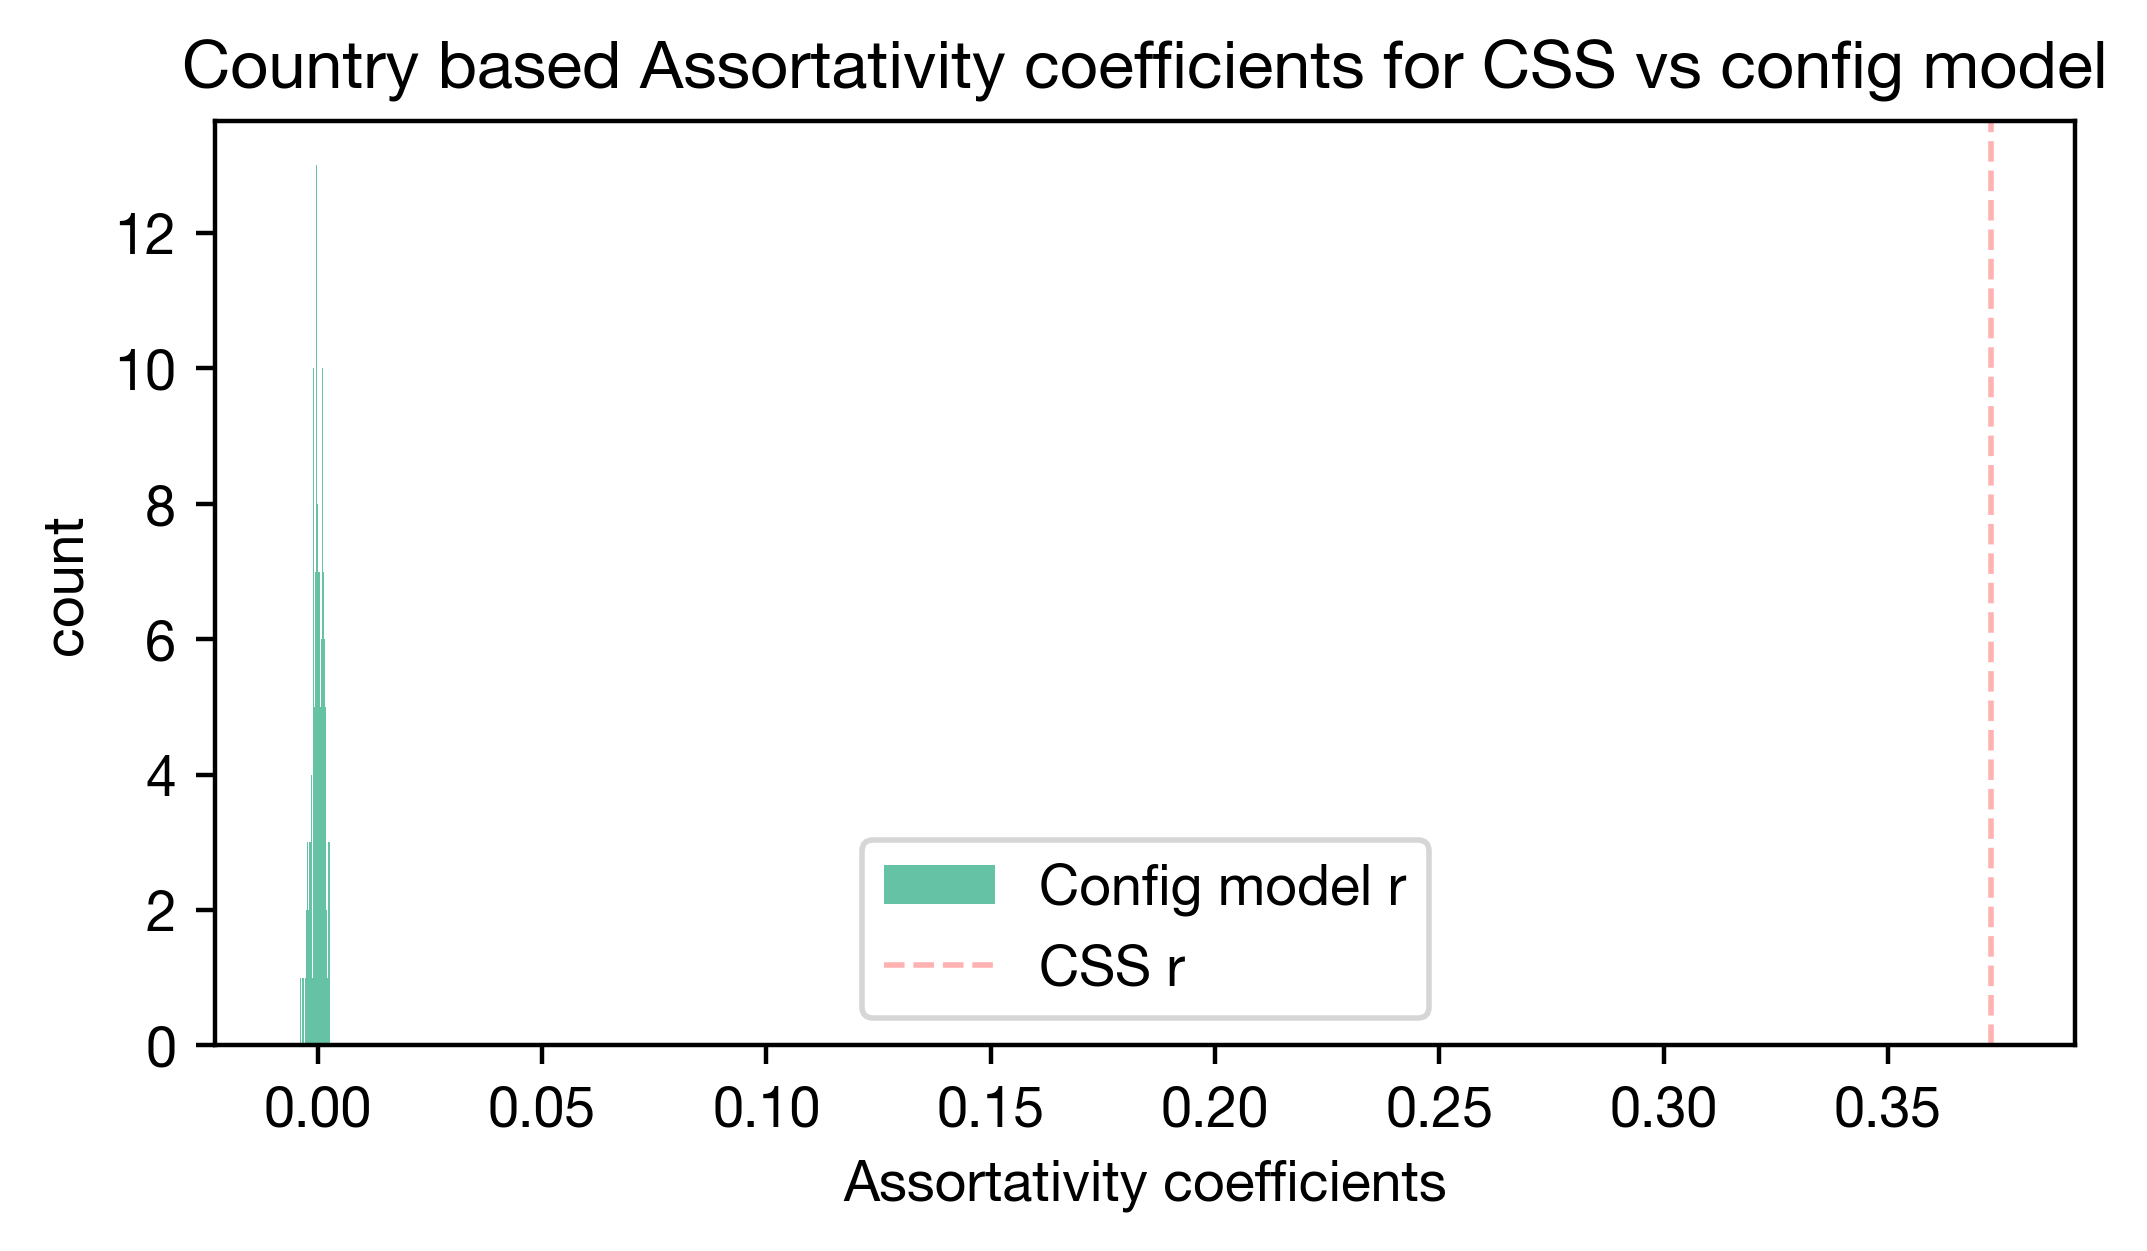

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,3))
ax.hist(assortativity_coefs, bins = 50, label = 'Config model r')
ax.axvline(x = r_CSS, color='red', linestyle='--', label='CSS r', alpha = 0.3)
ax.set_xlabel('Assortativity coefficients')
ax.set_ylabel('count')
ax.set_title('Country based Assortativity coefficients for CSS vs config model')
ax.legend()

plt.show()

As can be seen above there is a significant difference in the assortativity coefficients of the config models and of the CSS network, which indicates that there is significant evidence that based on country the CSS network is assortative

> __Exercise 2: Zachary's karate club__: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html)
>
> 1. Visualize the graph. Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.

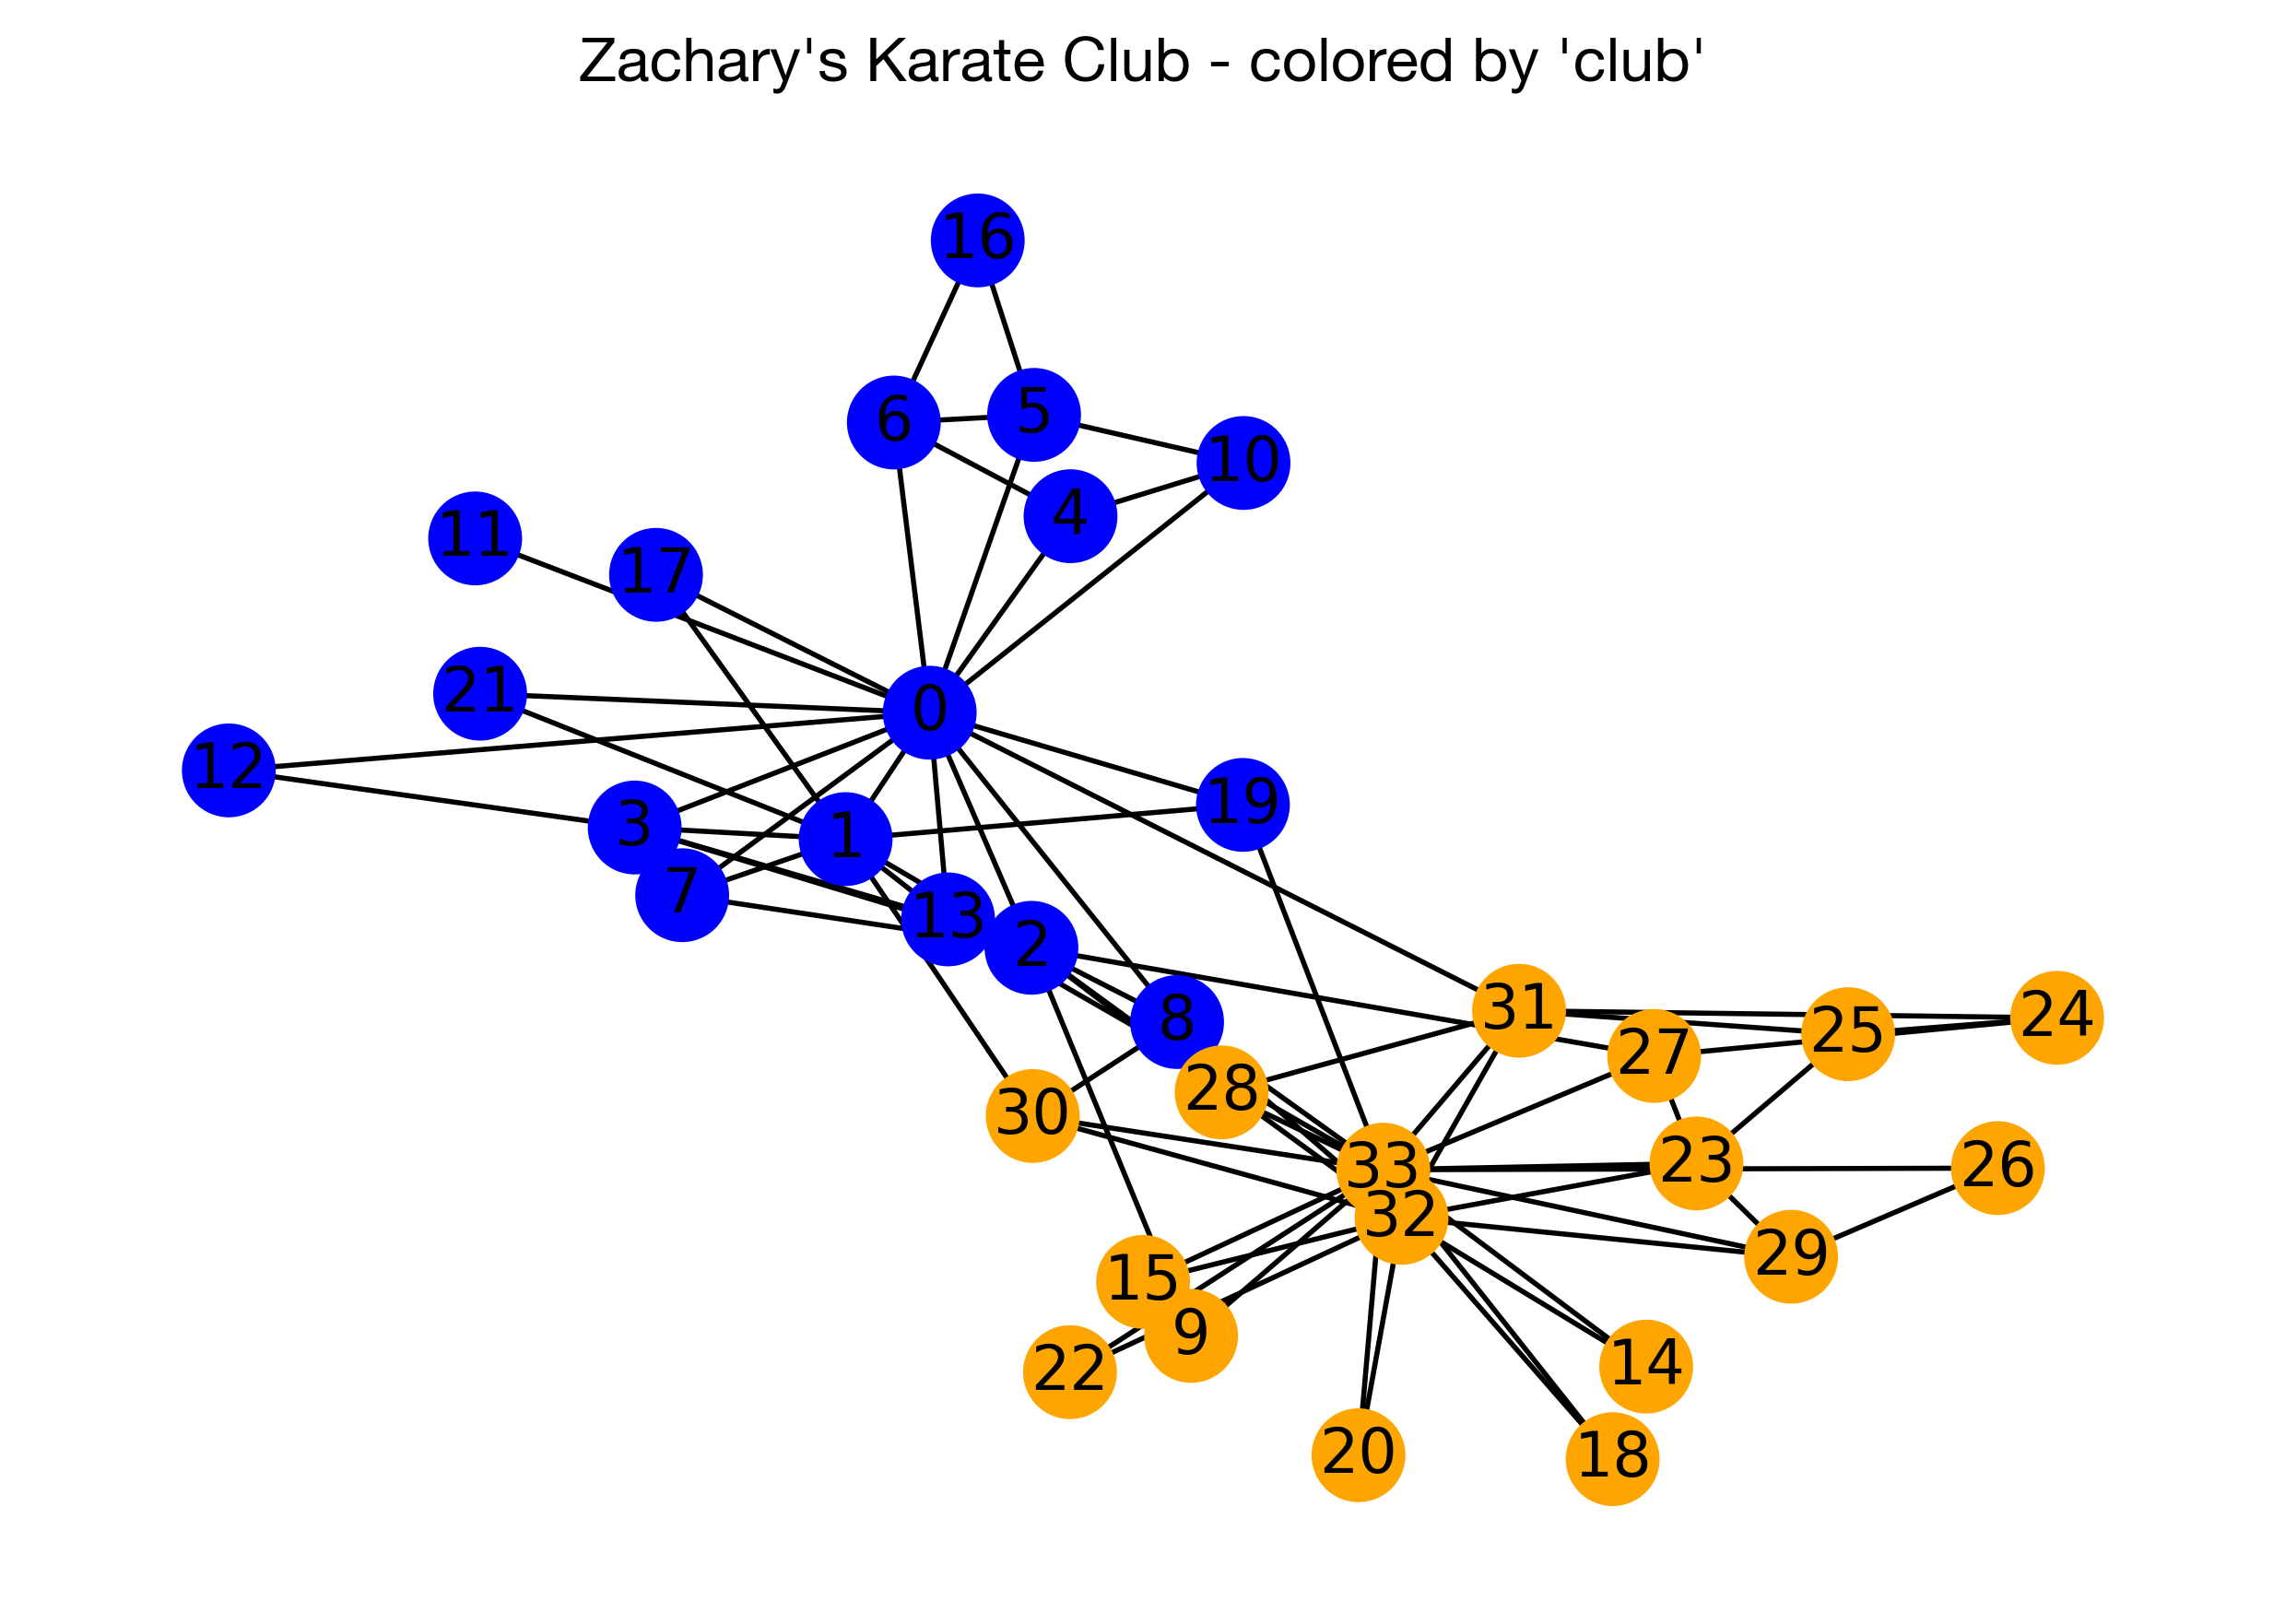

In [40]:
import csv
import ast
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain


G_karate = nx.karate_club_graph()
pos_karate = nx.spring_layout(G_karate, seed=42)

colors = []
for n in G_karate.nodes():
    if G_karate.nodes[n]['club'] == 'Mr. Hi':
        colors.append('blue')
    else:
        colors.append('orange')

plt.figure()
nx.draw(G_karate, pos=pos_karate, node_color=colors, with_labels=True)
plt.title("Zachary's Karate Club - colored by 'club'")
plt.show()

> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.


In [41]:
def compute_modularity(G, partition):
    m = G.number_of_edges()
    if m == 0:
        return 0.0
    degrees = dict(G.degree())
    Q = 0.0
    for i in G.nodes():
        for j in G.nodes():
            if partition[i] == partition[j]:
                A_ij = 1 if G.has_edge(i, j) else 0
                Q += A_ij - (degrees[i]*degrees[j])/(2*m)
    return Q/(2*m)

> 3. Explain in your own words the concept of _modularity_.

"Modularity measures how many edges fall within groups vs. between groups, compared to what we'd expect by chance given node degrees."

> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.

In [42]:
club_partition = {}
for node in G_karate.nodes():
    if G_karate.nodes[node]['club'] == 'Mr. Hi':
        club_partition[node] = 0
    else:
        club_partition[node] = 1

mod_club = compute_modularity(G_karate, club_partition)
print(f"Modularity of Karate 'club' partition = {mod_club:.4f}")

Modularity of Karate 'club' partition = 0.3582


> 5. Create $1000$ randomized version of the Karate Club network using the _double edge swap_ algorithm you wrote in the exercise above 5. For each of them, compute the modularity of the "club" split and store it in a list.

In [43]:
def double_edge_swap_undirected(G, n_swaps=None):
    edges = list(G.edges())
    E = len(edges)
    if n_swaps is None:
        n_swaps = E*10
    edge_set = {tuple(sorted(e)) for e in G.edges()}
    for i in range(n_swaps):
        pass

num_random = 1000
random_mods = []
for _ in range(num_random):
    G_copy = G_karate.copy()
    double_edge_swap_undirected(G_copy)
    r_val = compute_modularity(G_copy, club_partition)
    random_mods.append(r_val)

> 6. Compute the average and standard deviation of the modularity for the random network.

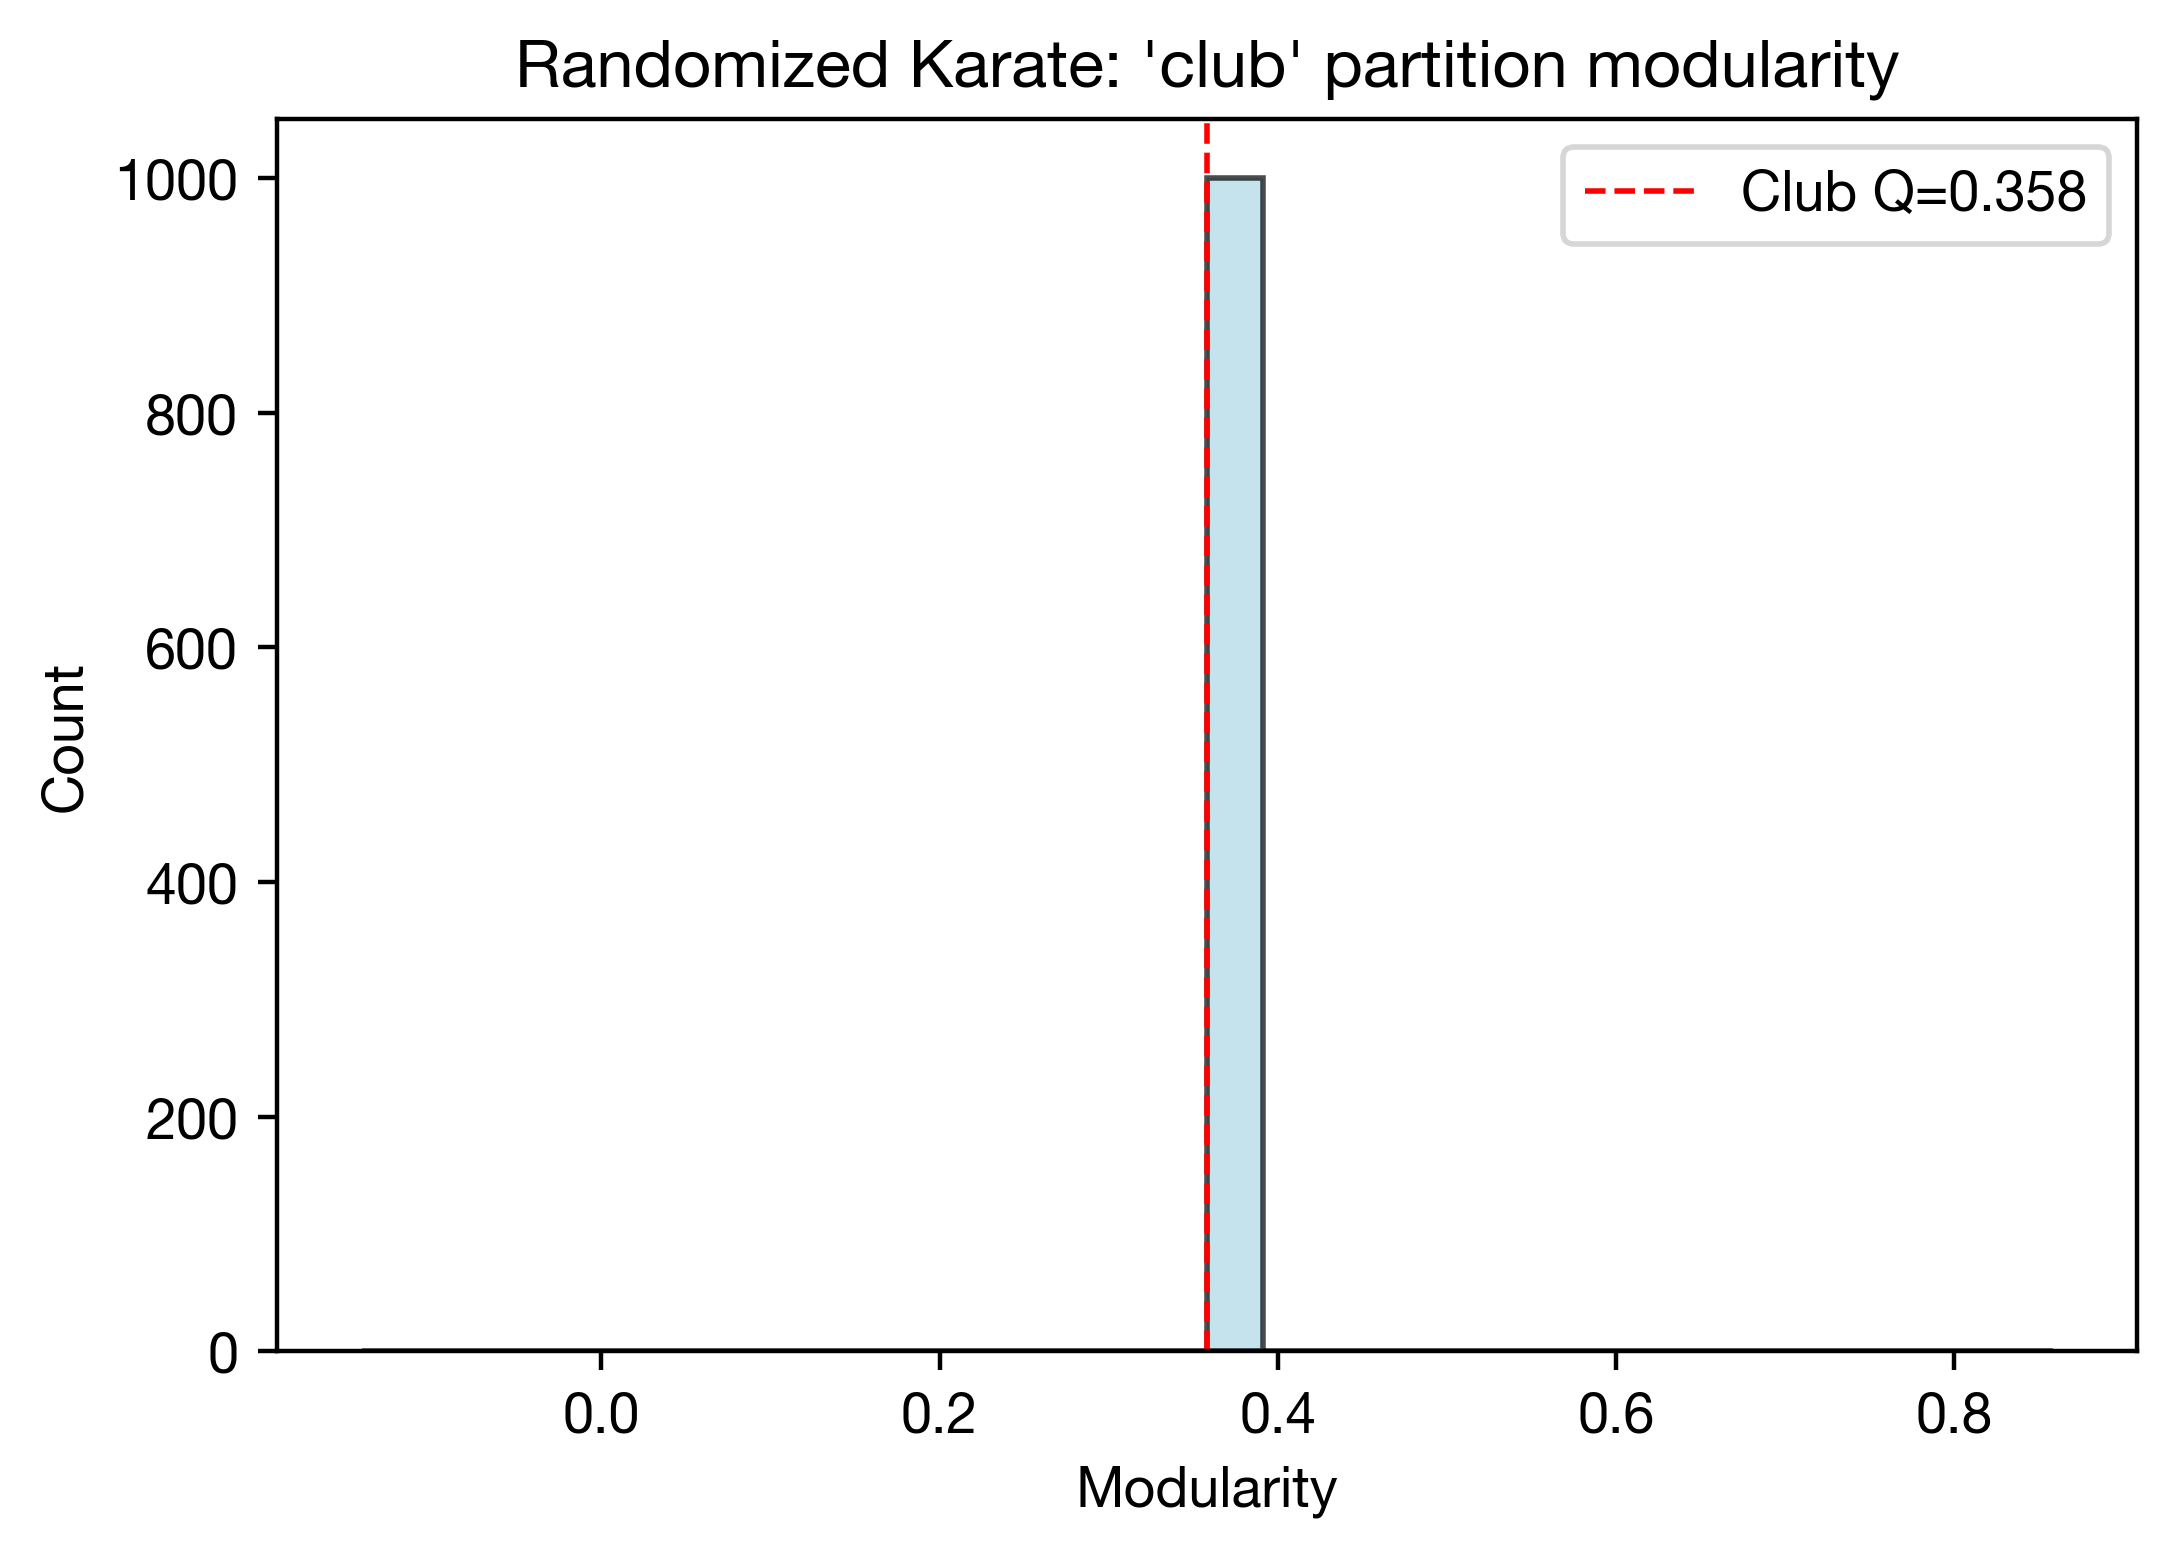

In [44]:
mean_rand = np.mean(random_mods)
plt.hist(random_mods, bins=30, alpha=0.7, color='lightblue', edgecolor='k')
plt.axvline(mod_club, color='red', linestyle='--', label=f'Club Q={mod_club:.3f}')
plt.title("Randomized Karate: 'club' partition modularity")
plt.xlabel("Modularity")
plt.ylabel("Count")
plt.legend()
plt.show()

> 7. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)).

If the red line is well above the bulk, 'club' partition is more structured than random, etc.

> 8. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?

In [45]:
louvain_partition = community_louvain.best_partition(G_karate)
mod_louvain = compute_modularity(G_karate, louvain_partition)
print(f"Louvain found {len(set(louvain_partition.values()))} communities, Q={mod_louvain:.4f}")

Louvain found 4 communities, Q=0.4151


> 9.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?

In [46]:
import numpy as np

comms = sorted(set(louvain_partition.values()))
comm_idx = {c: i for i,c in enumerate(comms)}
club_idx = {"Mr. Hi":0, "Officer":1}
C = np.zeros((len(comms), 2), dtype=int)
for n in G_karate.nodes():
    c_louvain = louvain_partition[n]
    c_club = G_karate.nodes[n]['club']
    i = comm_idx[c_louvain]
    j = club_idx[c_club]
    C[i,j] += 1

print("Confusion matrix (rows=Louvain, cols=[Mr Hi, Officer])")
print(C)

Confusion matrix (rows=Louvain, cols=[Mr Hi, Officer])
[[11  0]
 [ 0  4]
 [ 5  0]
 [ 1 13]]


> 10.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

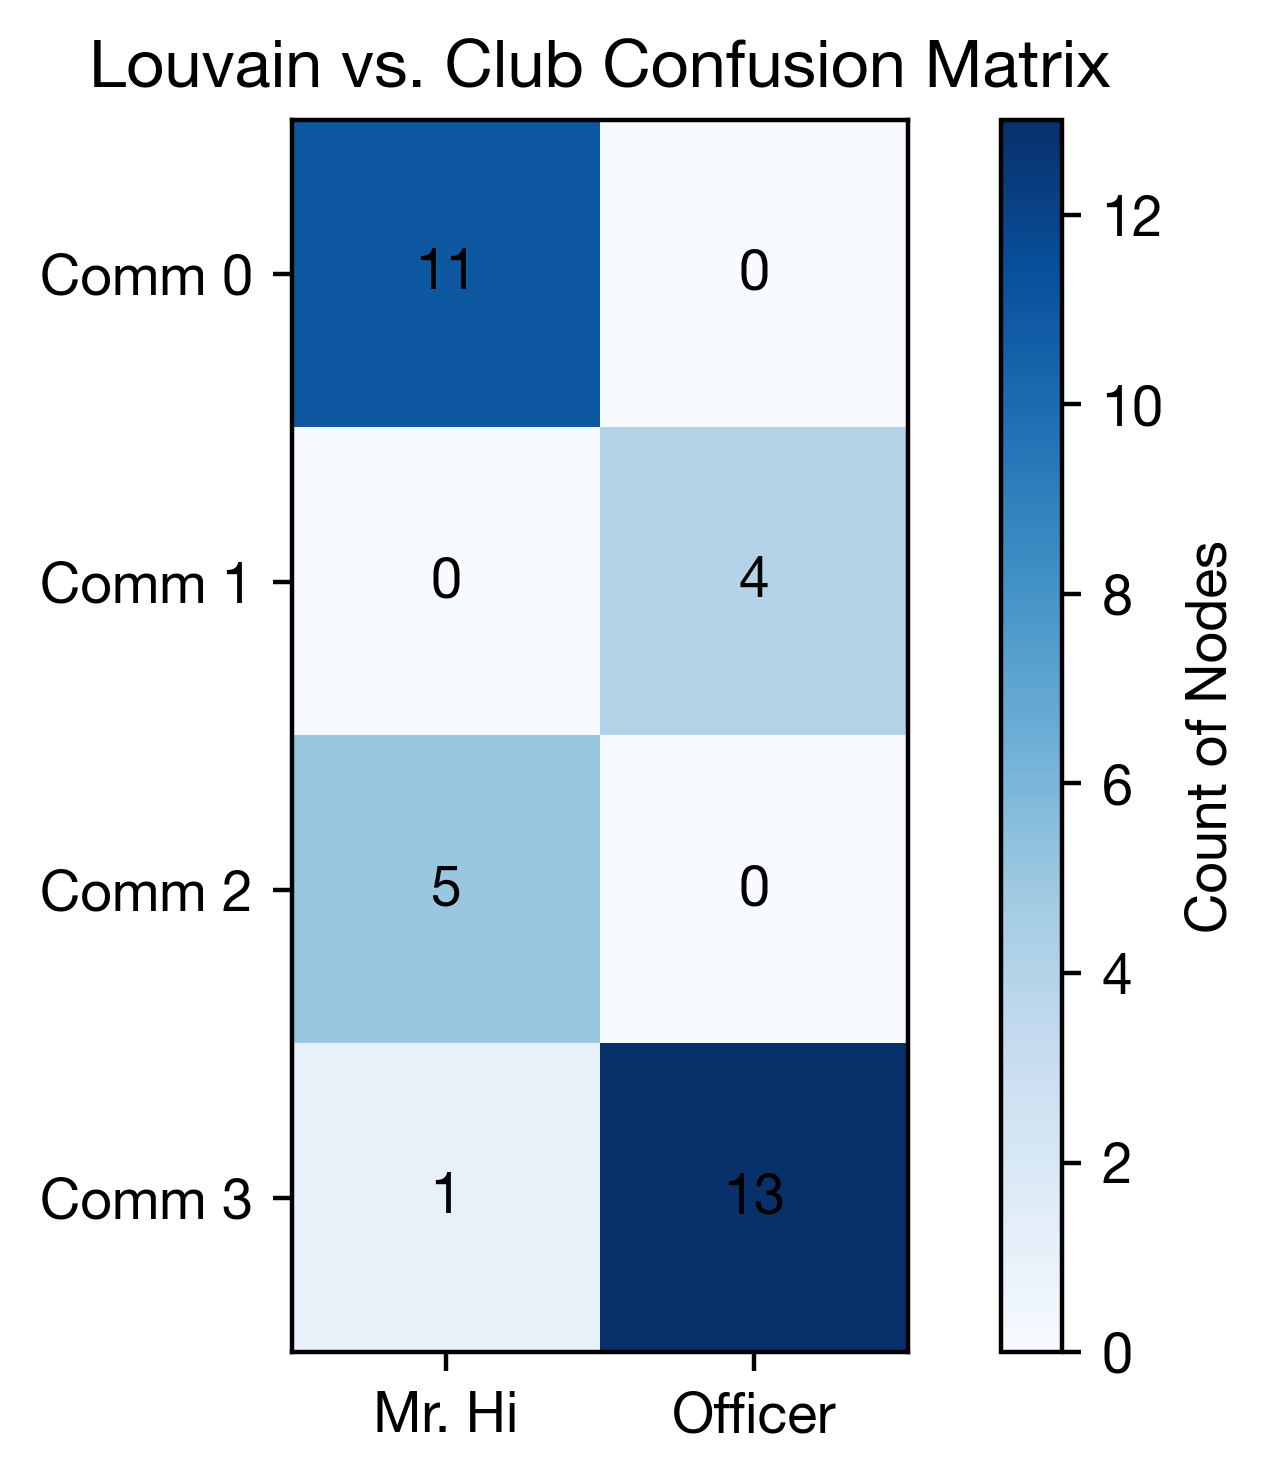

In [47]:
plt.imshow(C, cmap='Blues')
plt.colorbar(label='Count of Nodes')
plt.title("Louvain vs. Club Confusion Matrix")
plt.xticks([0,1], ["Mr. Hi", "Officer"])
plt.yticks(range(len(comms)), [f"Comm {c}" for c in comms])
for i in range(len(comms)):
    for j in range(2):
        plt.text(j, i, str(C[i,j]), ha='center', va='center', color='black')
plt.show()

## Part 3 - Words that characterize Computational Social Science communities

These exercises are taken from Week 8
> __Exercise 1: TF-IDF and the Computational Social Science communities.__ The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists.
> What you need for this exercise: 
>    * The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.  
>    * the tokenized _abstract_ dataframe (Week 7, Exercise 2)
>
> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?
> 2. Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 
>   * Consider a community _c_
>   * Find all the abstracts of papers written by a member of community _c_.
>   * Create a long array that stores all the abstract tokens 
>   * Repeat for all the communities. 
> __Note:__ Here, to ensure your code is efficient, you shall exploit ``pandas`` builtin functions, such as [``groupby.apply``](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) or [``explode``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).
> 3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the __top 5 communities__ (by number of authors). 
>   * Describe similarities and differences between the communities.
>   * Why aren't the TFs not necessarily a good description of the communities?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?
> 4. We're ready to calculate TF-IDF. Do that for the __top 9 communities__ (by number of authors). Then for each community: 
>   * List the 10 top TF words 
>   * List the 10 top TF-IDF words
>   * List the top 3 authors (by degree)
>   * Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?




 __Exercise 2: The Wordcloud__. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
> * Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration). 
> * Comment on your results. What can you conclude on the different sub-communities in Computational Social Science? 
> * Look up online the top author in each community. In light of your search, do your results make sense?

 __Exercise 3: Computational Social Science__ 

> * Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science. 
> * In light of your data-driven analysis, has your understanding of the field changed? How? __(max 150 words)__